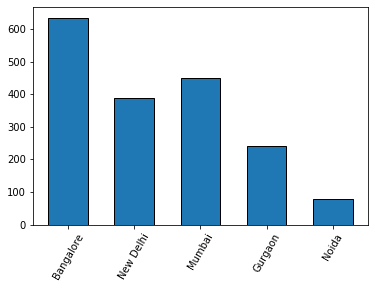

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## this function is used to correct name
def correct_city(s):
    l = s.split('/')
    city = l[0].strip()
    if city=='Delhi':
        return 'New Delhi'
    if city=='bangalore':
        return 'Bangalore'
    return city

df = pd.read_csv('Desktop/startup_funding.csv') 
df.CityLocation.dropna(inplace=True) # drop rows having nan values in CityLocation column

# Make a new column of correct city names
df['city'] = df.CityLocation.apply(correct_city)
city_count = df.city.value_counts()
#print(city_count)

cities = ['Bangalore', 'New Delhi', 'Mumbai', 'Gurgaon', 'Noida']
num_fundings = [city_count.loc[city] for city in cities]
#print(num_fundings)

plt.bar(cities, num_fundings, width=0.6, edgecolor='black')
plt.xticks(rotation=60)
plt.show()

('Sequoia Capital', 64)
('Accel Partners', 53)
('Kalaari Capital', 44)
('SAIF Partners', 41)
('Indian Angel Network', 40)


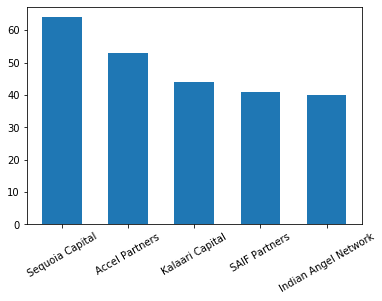

In [7]:
import numpy as np
import pandas as pd
import csv

import matplotlib.pyplot as plt

invest_count = {}
with open('Desktop/startup_funding.csv', encoding='utf8') as obj:
    file_data = csv.DictReader(obj, skipinitialspace=True)
    for row in file_data:
        investors = row['InvestorsName']
        if not pd.isnull(investors) and investors!='':
            inves_list = [investr.strip() for investr in investors.split(',')]
            for i in inves_list:
                invest_count[i] = invest_count.get(i,0)+1
    
invest_count_arr = list(invest_count.items())
invest_count_arr.sort(key=lambda x: x[1])
req_arr = invest_count_arr[::-1]
for i in range(5):
    print(req_arr[i])
    
arr = [req_arr[i][1] for i in range(5)]
invstrs = [req_arr[i][0] for i in range(5)]
plt.bar(invstrs, arr, width=0.6)
plt.xticks(rotation=30)
plt.show()


Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


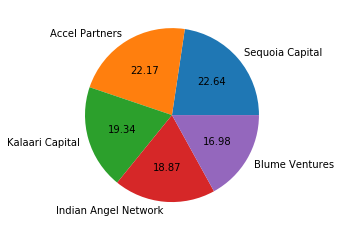

In [5]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

invest_count = {}
with open('startup_funding.csv', encoding='utf8') as obj:
    file_data = csv.DictReader(obj, skipinitialspace=True)
    for row in file_data:
        investors = row['InvestorsName']
        startup = row['StartupName']
        if not pd.isnull(investors) and investors!='' and not pd.isnull(startup) and startup!='':
            lwr_str = startup.lower()
            l1 = lwr_str.split() # to chk against oyo rooms
            l2 = lwr_str.split('.') # To chk against flipkart.com
            
            #if 'ola' in s_name.lower(): # can't do like that bcz it will also include startups like kolabro which is not ola
            
            if 'ola' in l1 or 'ola' in l2 or 'olacabs' in l1:
                req_startup = 'Ola'
            elif 'flipkart' in l1 or 'flipkart' in l2:
                req_startup = 'Flipkart'
            elif 'oyo' in l1 or 'oyo' in l2 or 'oyorooms' in l1:
                req_startup = 'Oyo'
            elif 'paytm' in l1 or 'paytm' in l2:
                req_startup = 'Paytm'
            else:
                req_startup = startup
                
            inves_list = [investr.strip() for investr in investors.split(',')]
            for i in inves_list:
                if i=='':
                    continue
                if invest_count.get(i,-1) == -1:
                    invest_count[i] = set()
                invest_count[i].add(req_startup)
    
invest_count_arr = list(invest_count.items())
#print(invest_count_arr)
invest_count_arr.sort(key=lambda x: len(x[1]))
req_arr = invest_count_arr[::-1]
for i in range(5):
    print(req_arr[i][0], len(req_arr[i][1]))
    
arr = [len(req_arr[i][1]) for i in range(5)]
invstrs = [req_arr[i][0] for i in range(5)]
plt.pie(arr, labels=invstrs, autopct='%.2f')
plt.show()

Indian Angel Network 33
Rajan Anandan 23
Anupam Mittal 16
LetsVenture 16
Group of Angel Investors 14


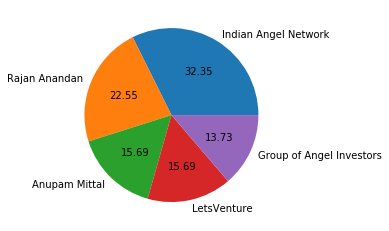

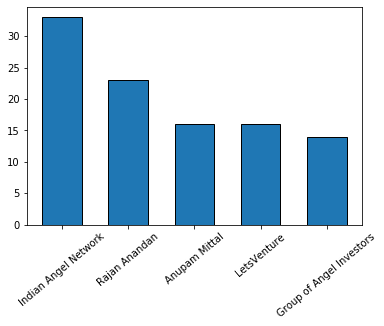

In [9]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

invest_count = {}
with open('Desktop/startup_funding.csv', encoding='utf8') as obj:
    file_data = csv.DictReader(obj, skipinitialspace=True)
    for row in file_data:
        investors = row['InvestorsName']
        startup = row['StartupName']
        inves_type = row['InvestmentType']
        if not pd.isnull(investors) and investors!='' and not pd.isnull(startup) and startup!='' and not pd.isnull(inves_type):
            if inves_type=='SeedFunding' or inves_type=='Seed Funding' or inves_type=='Crowd funding' or inves_type=='Crowd Funding':
                lwr_str = startup.lower()
                l1 = lwr_str.split() # to chk against oyo rooms
                l2 = lwr_str.split('.') # To chk against flipkart.com

                #if 'ola' in s_name.lower(): # can't do like that bcz it will also include startups like kolabro which is not ola

                if 'ola' in l1 or 'ola' in l2 or 'olacabs' in l1:
                    req_startup = 'Ola'
                elif 'flipkart' in l1 or 'flipkart' in l2:
                    req_startup = 'Flipkart'
                elif 'oyo' in l1 or 'oyo' in l2 or 'oyorooms' in l1:
                    req_startup = 'Oyo'
                elif 'paytm' in l1 or 'paytm' in l2:
                    req_startup = 'Paytm'
                else:
                    req_startup = startup

                inves_list = [investr.strip() for investr in investors.split(',')]
                for i in inves_list:
                    if i=='' or i=='Undisclosed Investors' or i=='Undisclosed investors':
                        continue
                    if invest_count.get(i,-1) == -1:
                        invest_count[i] = set()
                    invest_count[i].add(req_startup)

invest_count_arr = list(invest_count.items())
#print(invest_count_arr)
invest_count_arr.sort(key=lambda x: len(x[1]))
req_arr = invest_count_arr[::-1]
for i in range(5):
    print(req_arr[i][0], len(req_arr[i][1]))
    
arr = [len(req_arr[i][1]) for i in range(5)]
invstrs = [req_arr[i][0] for i in range(5)]
plt.pie(arr, labels=invstrs, autopct='%.2f')
plt.show()
plt.bar(invstrs, arr, width=0.6, edgecolor='black')
plt.xticks(rotation=40)
plt.show()

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


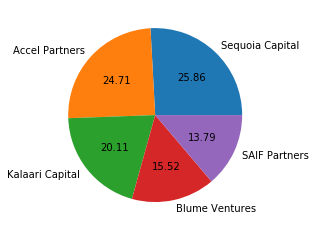

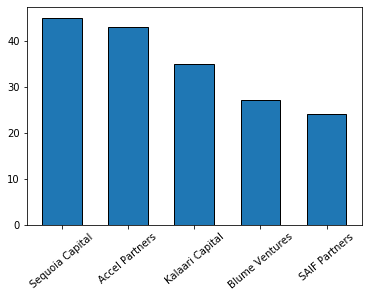

In [8]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

invest_count = {}
with open('Desktop/startup_funding.csv', encoding='utf8') as obj:
    file_data = csv.DictReader(obj, skipinitialspace=True)
    for row in file_data:
        investors = row['InvestorsName']
        startup = row['StartupName']
        inves_type = row['InvestmentType']
        if not pd.isnull(investors) and investors!='' and not pd.isnull(startup) and startup!='' and not pd.isnull(inves_type):
            if inves_type=='Private Equity' or inves_type=='PrivateEquity':
                lwr_str = startup.lower()
                l1 = lwr_str.split() # to chk against oyo rooms
                l2 = lwr_str.split('.') # To chk against flipkart.com

                #if 'ola' in s_name.lower(): # can't do like that bcz it will also include startups like kolabro which is not ola

                if 'ola' in l1 or 'ola' in l2 or 'olacabs' in l1:
                    req_startup = 'Ola'
                elif 'flipkart' in l1 or 'flipkart' in l2:
                    req_startup = 'Flipkart'
                elif 'oyo' in l1 or 'oyo' in l2 or 'oyorooms' in l1:
                    req_startup = 'Oyo'
                elif 'paytm' in l1 or 'paytm' in l2:
                    req_startup = 'Paytm'
                else:
                    req_startup = startup

                inves_list = [investr.strip() for investr in investors.split(',')]
                for i in inves_list:
                    if i=='' or i=='Undisclosed Investors' or i=='Undisclosed investors':
                        continue
                    if invest_count.get(i,-1) == -1:
                        invest_count[i] = set()
                    invest_count[i].add(req_startup)

invest_count_arr = list(invest_count.items())
#print(invest_count_arr)
invest_count_arr.sort(key=lambda x: len(x[1]))
req_arr = invest_count_arr[::-1]
for i in range(5):
    print(req_arr[i][0], len(req_arr[i][1]))
    
arr = [len(req_arr[i][1]) for i in range(5)]
invstrs = [req_arr[i][0] for i in range(5)]
plt.pie(arr, labels=invstrs, autopct='%.2f')
plt.show()
plt.bar(invstrs, arr, width=0.6, edgecolor='black')
plt.xticks(rotation=40)
plt.show()